In [1]:
# Initial imports
import pandas as pd
import datetime as dt
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
mana_path = Path("../Resources/index_reference/mana-usd-max.csv")
mana_df = pd.read_csv(mana_path, index_col="snapped_at", infer_datetime_format=True, parse_dates=True)
mana_df.index = mana_df.index.date
mana_df

,price,market_cap,total_volume
2017-10-28,0.010094,2.295129e+07,2.421181e+05
2017-10-29,0.010124,2.301864e+07,2.958165e+05
2017-10-30,0.009775,2.222603e+07,2.659636e+05
2017-10-31,0.009237,2.100224e+07,2.751197e+05
2017-11-01,0.010004,2.274761e+07,4.555642e+05
...,...,...,...
2021-04-02,1.012906,1.346325e+09,3.801542e+08
2021-04-03,1.035631,1.375571e+09,3.392498e+08
2021-04-04,0.942694,1.259852e+09,3.686334e+08
2021-04-05,1.002164,1.329384e+09,2.885374e+08


____________________________________________________________
** PLot Daily Prices **
____________________________________________________________

In [9]:
mana_prices = mana_df[['price']]
mana_prices

,price
2017-10-28,0.010094
2017-10-29,0.010124
2017-10-30,0.009775
2017-10-31,0.009237
2017-11-01,0.010004
...,...
2021-04-02,1.012906
2021-04-03,1.035631
2021-04-04,0.942694
2021-04-05,1.002164


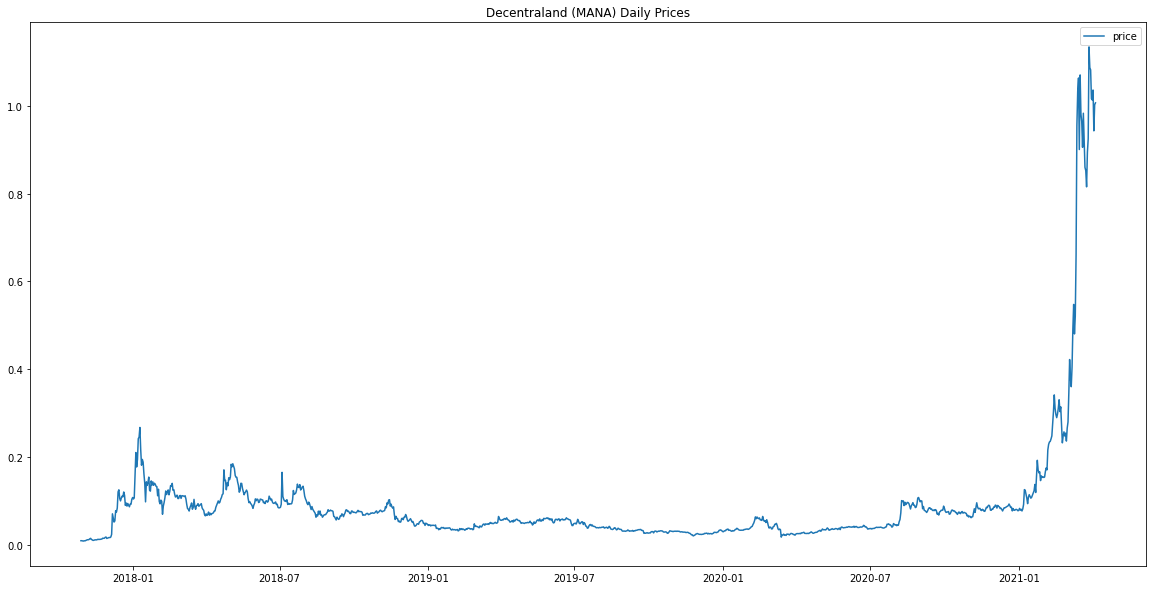

In [35]:
mana_prices.plot(figsize=[20,10], title="Decentraland (MANA) Daily Prices");

____________________________________________________________
** Calculate Daily Returns **
____________________________________________________________

In [13]:
mana_daily_returns = mana_prices.pct_change().dropna()
mana_daily_returns

,price
2017-10-29,0.002935
2017-10-30,-0.034433
2017-10-31,-0.055061
2017-11-01,0.083104
2017-11-02,-0.027987
...,...
2021-04-02,-0.002880
2021-04-03,0.022435
2021-04-04,-0.089739
2021-04-05,0.063084


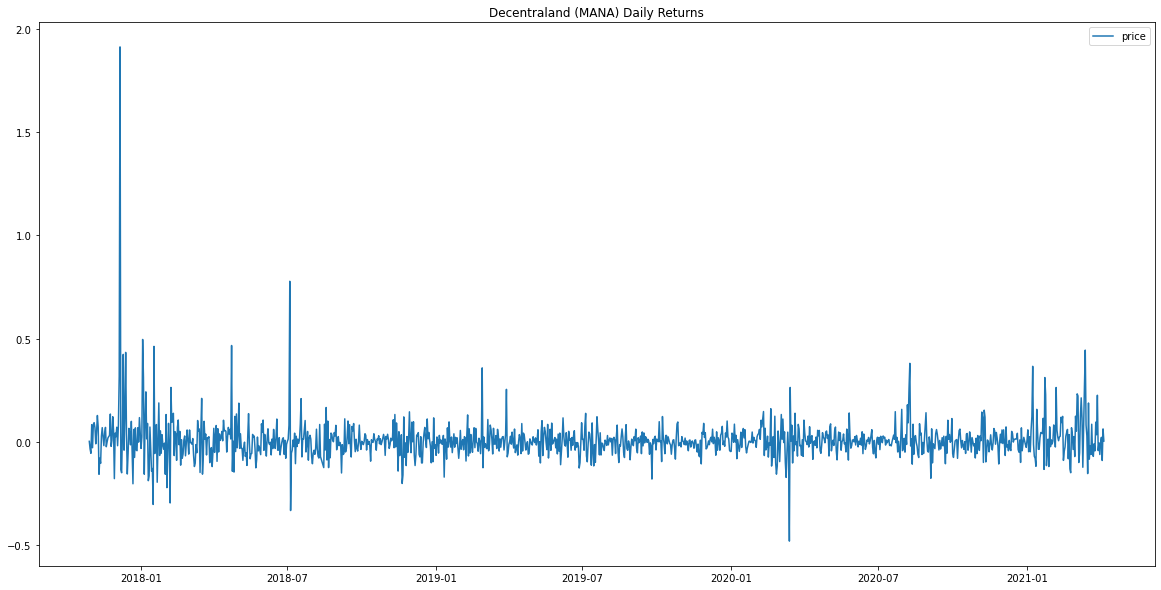

In [15]:
mana_daily_returns.plot(figsize=[20,10], title="Decentraland (MANA) Daily Returns");

____________________________________________________________
** Calculate Cumulative Returns **
____________________________________________________________

In [16]:
mana_cumulative_returns = (1 + mana_daily_returns).cumprod()
mana_cumulative_returns

,price
2017-10-29,1.002935
2017-10-30,0.968400
2017-10-31,0.915079
2017-11-01,0.991126
2017-11-02,0.963388
...,...
2021-04-02,100.347351
2021-04-03,102.598663
2021-04-04,93.391576
2021-04-05,99.283116


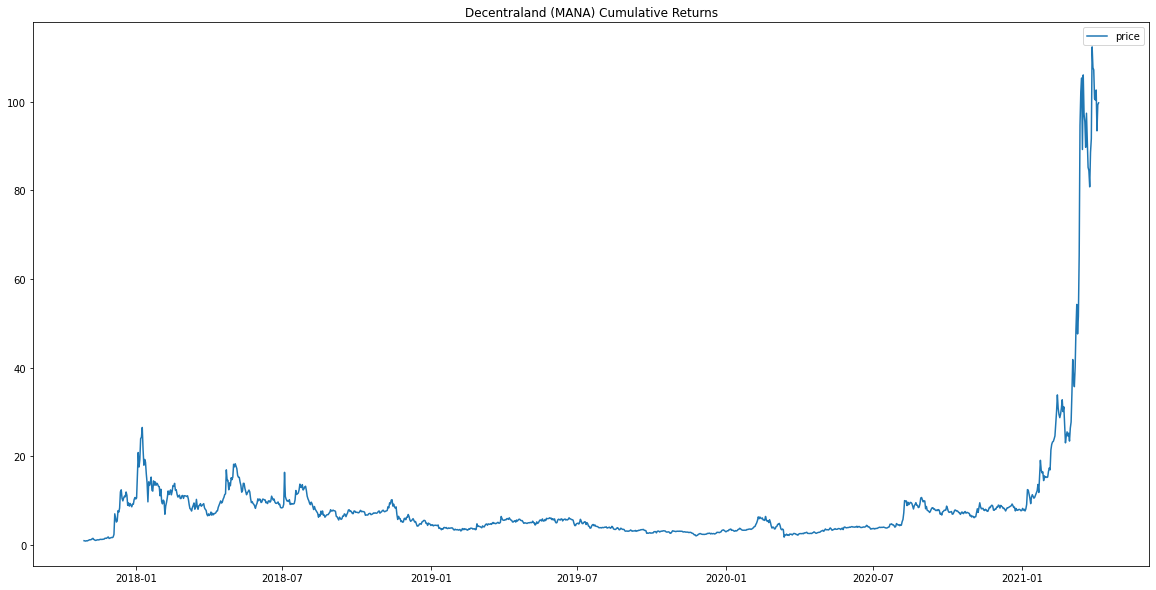

In [17]:
mana_cumulative_returns.plot(figsize=[20,10], title="Decentraland (MANA) Cumulative Returns");

____________________________________________________________
** Rolling Statistics **
____________________________________________________________

** >>>>>>>>> Rolling Means **

In [58]:
# Rolling 7 Day Mean

mana_7d_rolling_mean_price = mana_prices.rolling(window=7).mean().round(2).dropna()
mana_7d_rolling_mean_price = mana_7d_rolling_mean_price.rename(columns={'price': '7-day rolling price average'})

mana_30d_rolling_mean_price = mana_prices.rolling(window=30).mean().round(2).dropna()
mana_30d_rolling_mean_price = mana_30d_rolling_mean_price.rename(columns={'price': '30-day rolling price average'})

mana_180d_rolling_mean_price = mana_prices.rolling(window=180).mean().round(2).dropna()
mana_180d_rolling_mean_price = mana_180d_rolling_mean_price.rename(columns={'price': '180-day rolling price average'})


mana_7d_rolling_mean_price.head()

,7-day rolling price average
2017-11-03,0.01
2017-11-04,0.01
2017-11-05,0.01
2017-11-06,0.01
2017-11-07,0.01


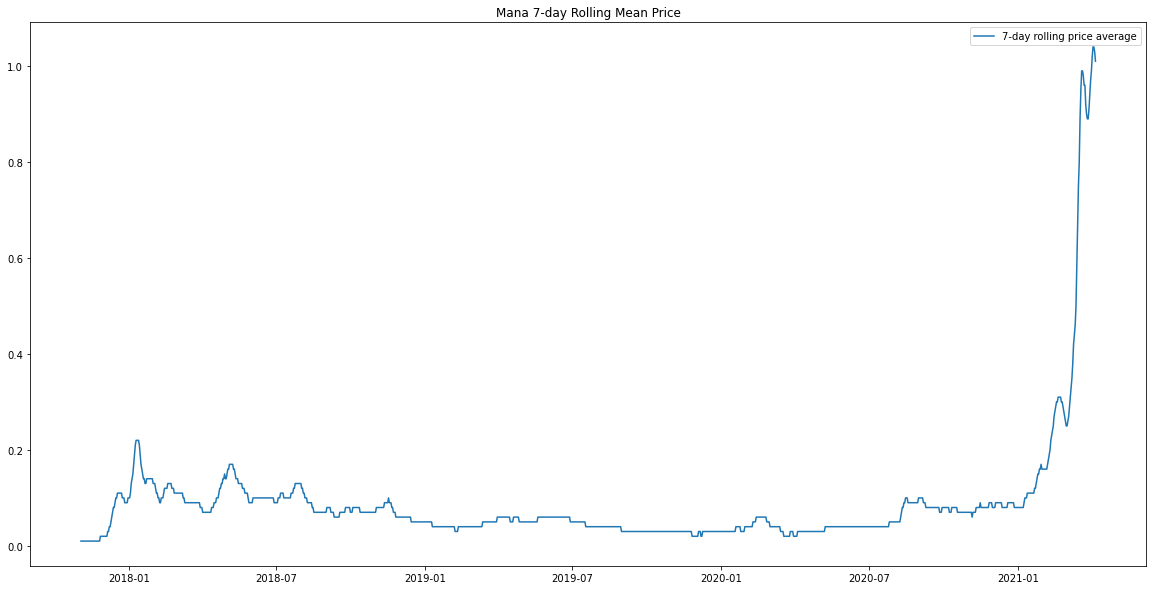

In [59]:
mana_7d_rolling_mean_price.plot(title="Mana 7-day Rolling Mean Price", figsize=[20, 10]);

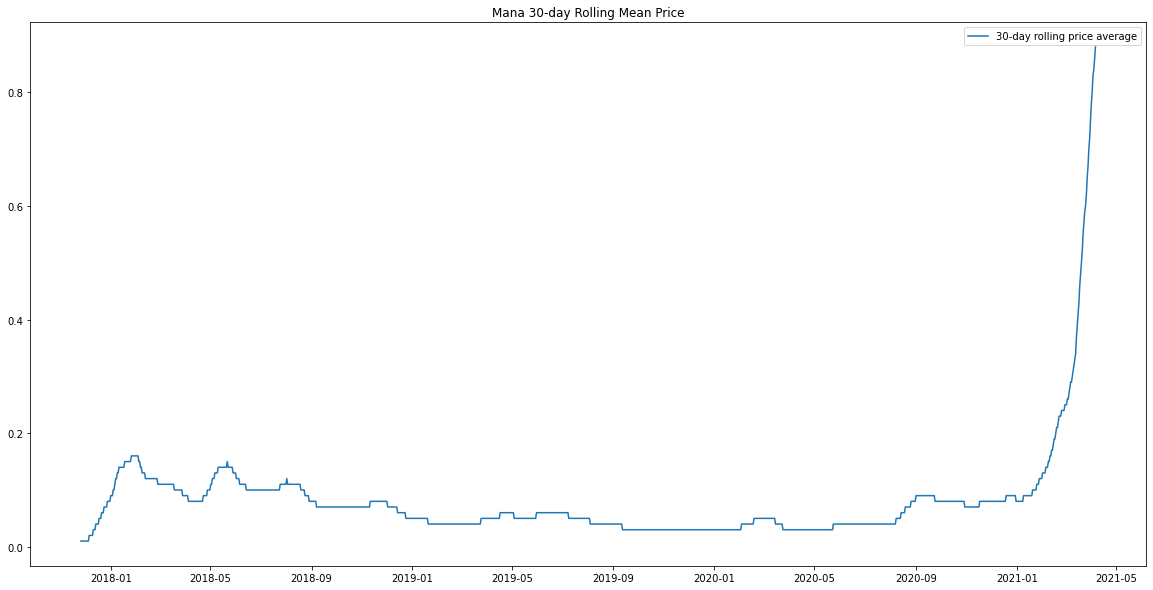

In [60]:
mana_30d_rolling_mean_price.plot(title="Mana 30-day Rolling Mean Price", figsize=[20, 10]);

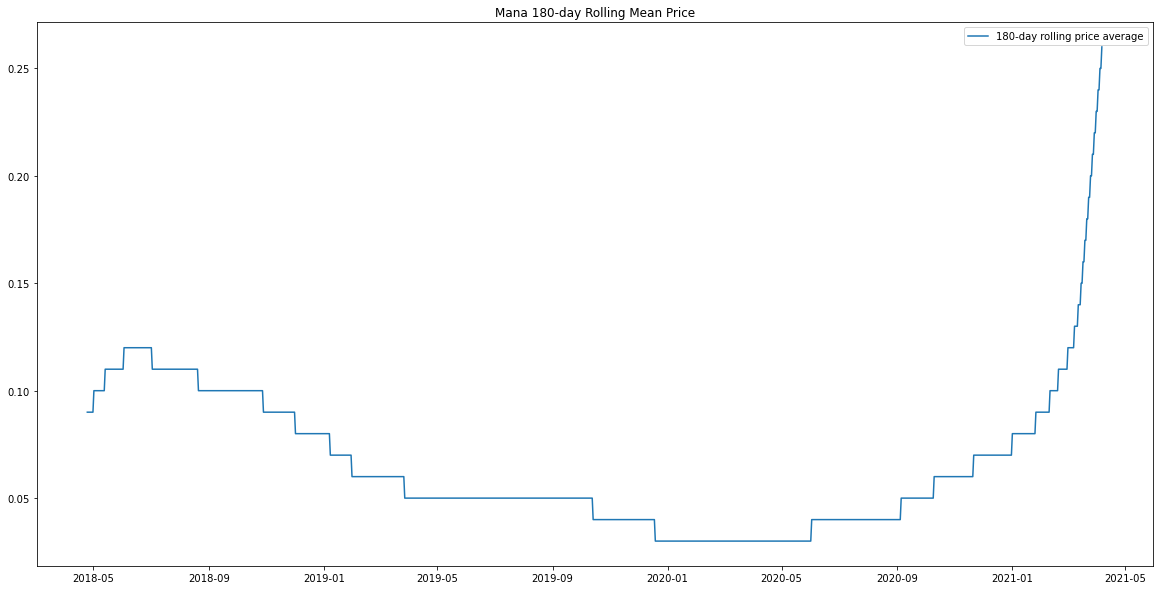

In [61]:
mana_180d_rolling_mean_price.plot(title="Mana 180-day Rolling Mean Price", figsize=[20, 10]);

** >>>>>>>>> 7 Day Rolling Stdev **

In [62]:
# Rolling 7 Day Standard Deviation

mana_7d_rolling_price_std = mana_prices.rolling(window=7).std().round(2).dropna()
mana_7d_rolling_price_std = mana_7d_rolling_price_std.rename(columns={'price': '7-day rolling price stdev'})

mana_30d_rolling_price_std = mana_prices.rolling(window=30).std().round(2).dropna()
mana_30d_rolling_price_std = mana_30d_rolling_price_std.rename(columns={'price': '30-day rolling price average'})

mana_180d_rolling_price_std = mana_prices.rolling(window=180).std().round(2).dropna()
mana_180d_rolling_price_std = mana_180d_rolling_price_std.rename(columns={'price': '180-day rolling price average'})


mana_7d_rolling_price_std.head()

,7-day rolling price stdev
2017-11-03,0.0
2017-11-04,0.0
2017-11-05,0.0
2017-11-06,0.0
2017-11-07,0.0


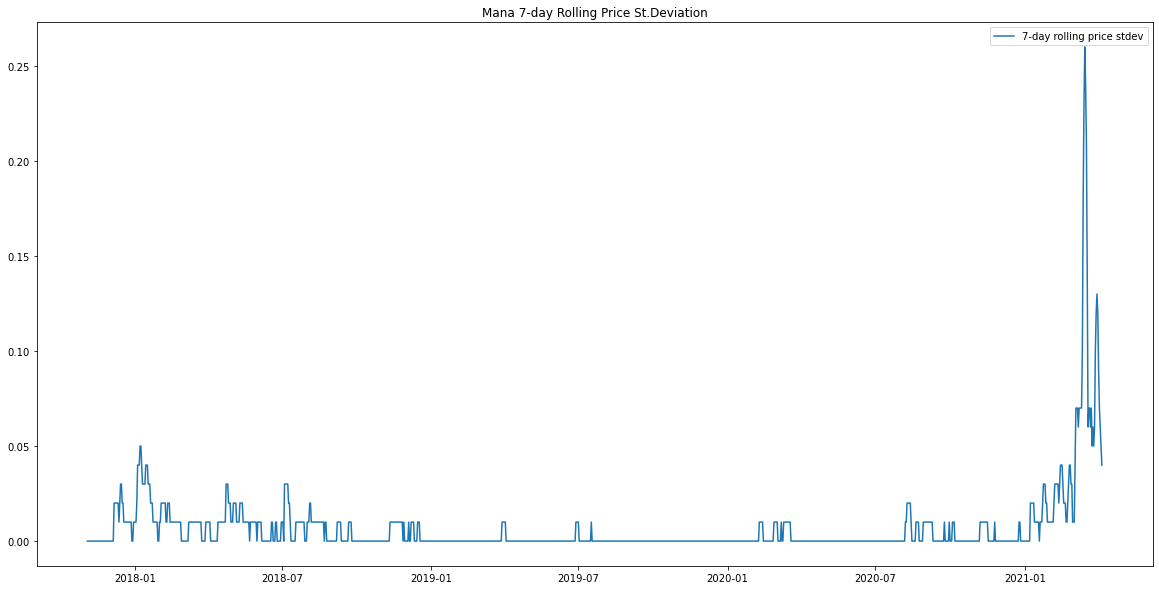

In [63]:
mana_7d_rolling_price_std.plot(title="Mana 7-day Rolling Price St.Deviation", figsize=[20, 10]);

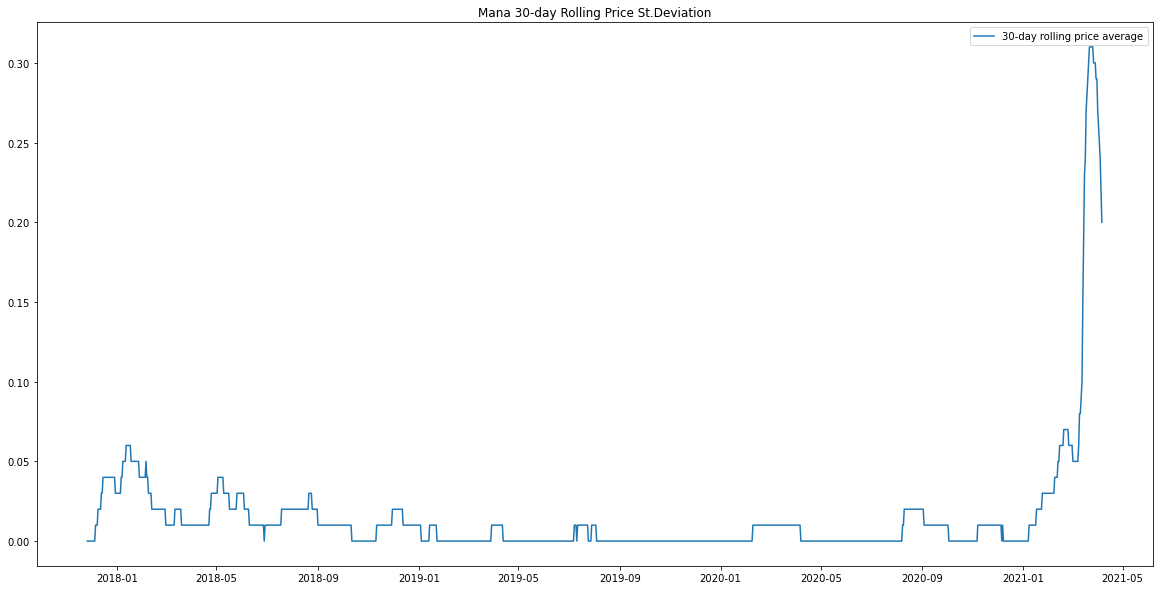

In [64]:
mana_30d_rolling_price_std.plot(title="Mana 30-day Rolling Price St.Deviation", figsize=[20, 10]);

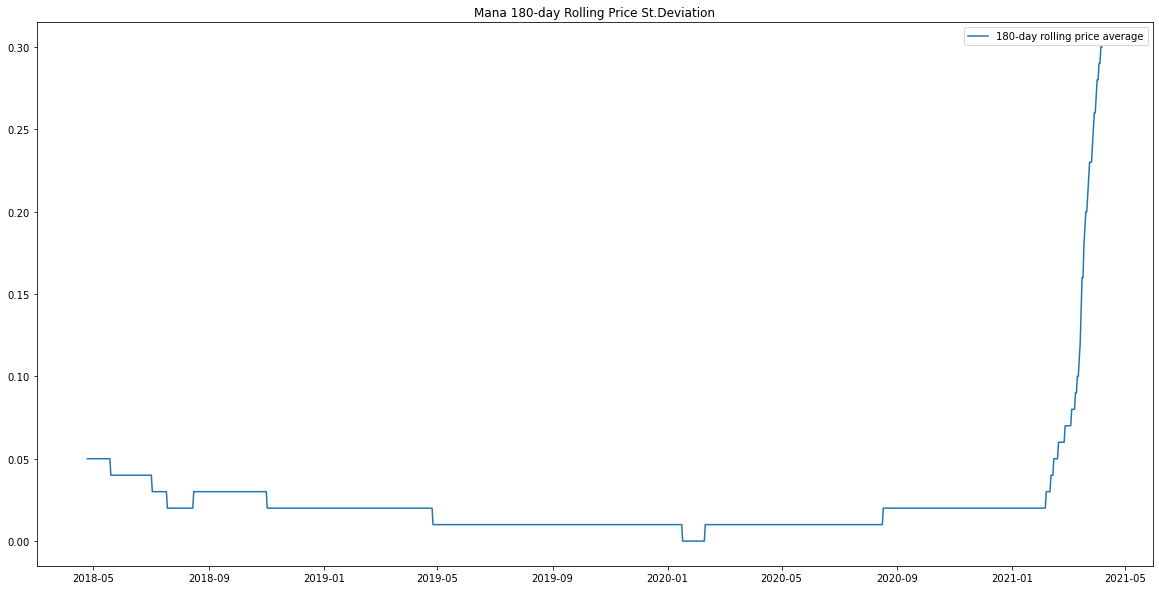

In [65]:
mana_180d_rolling_price_std.plot(title="Mana 180-day Rolling Price St.Deviation", figsize=[20, 10]);

** Add rolling averages on original plot **

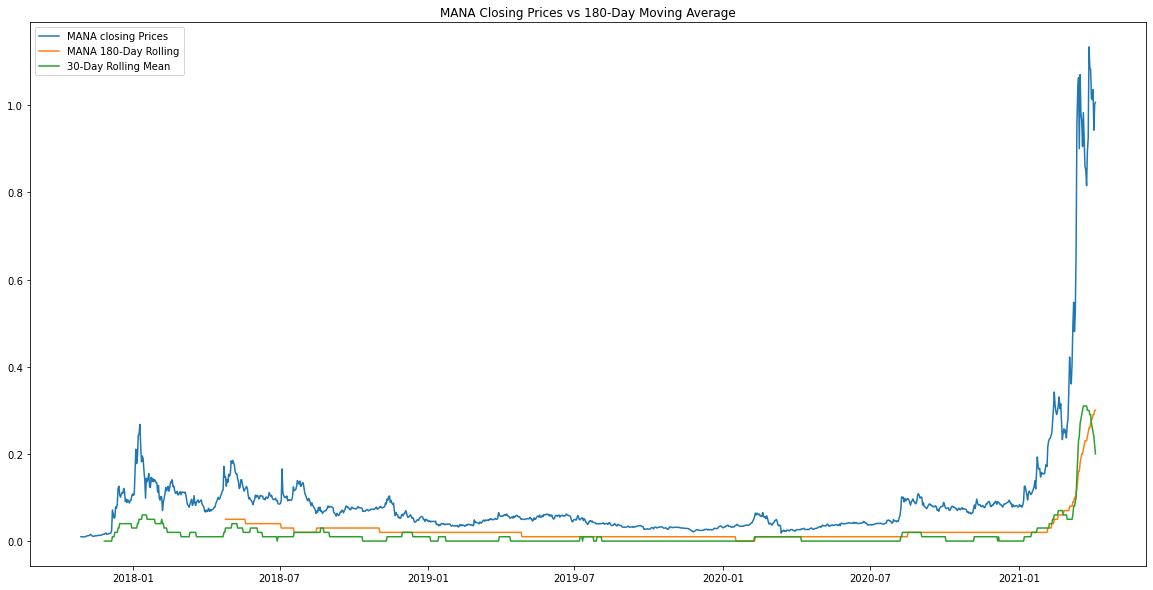

In [76]:
# Set figure of the daily closing prices of MANA
mana_prices_plot = mana_prices.plot(figsize=[20,10], title="MANA Closing Prices vs 180-Day Moving Average");

# Plot Rolling Means on the same figure
mana_180d_rolling_price_std.plot(ax=mana_prices_plot);
mana_30d_rolling_price_std.plot(ax=mana_prices_plot);


# Set the legend of the figure
mana_prices_plot.legend(['MANA closing Prices', 'MANA 180-Day Rolling', '30-Day Rolling Mean']);

In [ ]:
# Therefore, 180 Day rolling average is very much below. Therefore, bull market

____________________________________________________________
** BETA CALCULATIONS **
____________________________________________________________

** import index csv into dataframe **

In [87]:
index_path = Path("../Resources/index_exports/2021-04-08-15-01-index.csv")
mana_df = pd.read_csv(index_path, infer_datetime_format=True, parse_dates=True)
columns = ['date', 'daily_index_returns']
mana_df.columns = columns
mana_df.set_index(mana_df['date'], inplace=True)
mana_df.drop(['date'], axis=1, inplace=True)
mana_df


,daily_index_returns
date,
2021-01-28,-0.109674
2021-01-29,0.023549
2021-01-30,0.017200
2021-01-31,-0.004315
2021-02-01,-0.018603
...,...
2021-04-02,-0.052479
2021-04-03,0.009025
2021-04-04,-0.047126
